In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import numpy as np

data=pd.read_excel('겨울.xlsx')

print(data.head())
print(data.tail())
data.info()
data.isna().sum()

# 강하천 데이터 삭제
# 강원 : 북강릉, 경기 : 수원, 경남 : 창원, 경북 : 안동, 대구, 광주, 대전, 부산, 서울, 울산, 인천, 전남 : 여수, 전북: 전주, 충북:청주, 충남: 

# 중부: 강원, 경기, 서울, 인천, 충북, 대전 
# 남부: 경북, 경남, 전북, 전남, 대구, 울산, 부산, 제주, 
data.value_counts()



    지점      년도                   서리    서리.1                 서리.2   서리.3  \
0  NaN     NaN                   시작  시작(평비)                    끝  끝(평비)   
1   강릉  2005.0  2005-11-30 00:00:00          2006-03-19 00:00:00          
2   강릉  2006.0  2006-12-01 00:00:00          2007-03-29 00:00:00          
3   강릉  2007.0  2007-12-27 00:00:00          2008-03-22 00:00:00          
4   강릉  2008.0                                                            

                    얼음    얼음.1                 얼음.2   얼음.3  ...  \
0                   시작  시작(평비)                    끝  끝(평비)  ...   
1  2005-11-17 00:00:00          2006-03-29 00:00:00         ...   
2  2006-11-07 00:00:00          2007-04-04 00:00:00         ...   
3  2007-11-18 00:00:00          2008-03-22 00:00:00         ...   
4                                                           ...   

                   눈.2    눈.3                   관설    관설.1  \
0                    끝  끝(평비)                   시작  시작(평비)   
1  2006-03-30 00:00:00

지점   년도      서리                   서리.1  서리.2                 서리.3  얼음                   얼음.1  얼음.2                 얼음.3  눈                    눈.1   눈.2                  눈.3   관설                   관설.1  관설.2                 관설.3  강하천                  강하천.1  강하천.2                강하천.3
강릉   2005.0  2005-11-30 00:00:00        2006-03-19 00:00:00        2005-11-17 00:00:00        2006-03-29 00:00:00        2005-12-04 00:00:00        2006-03-30 00:00:00        2005-10-22 00:00:00        2006-04-25 00:00:00        2005-12-12 00:00:00         2006-03-07 00:00:00           1
인천   2021.0  2021-11-17 00:00:00  6일    2022-04-02 00:00:00  10일   2021-11-10 00:00:00  1일    2022-03-21 00:00:00  -5일   2021-11-22 00:00:00  -1일   2022-03-19 00:00:00  4일                                                                                                                    1
     2008.0  2008-11-19 00:00:00  8일    2009-03-04 00:00:00  -19일  2008-11-17 00:00:00  8일    2009-03-29 00:00:00  3일    2008-11-18 00:00:

In [143]:
data1=data[['지점', '년도','얼음.1','눈.1']]
data1.columns=['지점','년도','얼음시작평비','눈시작평비']
data1=data1.drop(0)
data1=data1.replace('―',None)
data1.fillna(method='bfill')
data1

C:\Users\kdp\AppData\Local\Temp\ipykernel_23456\2853780340.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data1.fillna(method='bfill')


,지점,년도,얼음시작평비,눈시작평비
1,강릉,2005.0,,
2,강릉,2006.0,,
3,강릉,2007.0,,
4,강릉,2008.0,,
5,강릉,2009.0,,
...,...,...,...,...
1011,충주,2019.0,,
1012,충주,2020.0,,
1013,충주,2021.0,,
1014,충주,2022.0,,


In [144]:
data1['얼음시작평비'] = data1['얼음시작평비'].str.replace('일','')
data1['눈시작평비'] = data1['눈시작평비'].str.replace('일','')
data1

,지점,년도,얼음시작평비,눈시작평비
1,강릉,2005.0,,
2,강릉,2006.0,,
3,강릉,2007.0,,
4,강릉,2008.0,,
5,강릉,2009.0,,
...,...,...,...,...
1011,충주,2019.0,,
1012,충주,2020.0,,
1013,충주,2021.0,,
1014,충주,2022.0,,


In [145]:
middle_df=data1[data1['지점'].isin(['북강릉','수원','서울','인천','청주','대전'])]
south_df=data1[data1['지점'].isin(['창원','전주','여수','대구','울산','부산'])]

middle_df['년도']=middle_df['년도'].map(np.int64)
middle_df.isna().sum()
middle_df.head()
middle_df.dtypes

C:\Users\kdp\AppData\Local\Temp\ipykernel_23456\494802252.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  middle_df['년도']=middle_df['년도'].map(np.int64)


지점        object
년도         int64
얼음시작평비    object
눈시작평비     object
dtype: object

In [146]:
middle_df['얼음시작평비']=middle_df['얼음시작평비'].str.replace('일','')
middle_df=middle_df.astype({'얼음시작평비':'int64'})

middle_df['눈시작평비']=middle_df['눈시작평비'].str.replace('일','')
middle_df=middle_df.astype({'눈시작평비':'int64'})

middle_df

C:\Users\kdp\AppData\Local\Temp\ipykernel_23456\3664901151.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  middle_df['얼음시작평비']=middle_df['얼음시작평비'].str.replace('일','')


,지점,년도,얼음시작평비,눈시작평비
39,북강릉,2008,6,14
40,북강릉,2009,-10,-35
41,북강릉,2010,-9,0
42,북강릉,2011,8,-6
43,북강릉,2012,-10,-6
...,...,...,...,...
981,청주,2019,6,-5
982,청주,2020,2,12
983,청주,2021,11,-1
984,청주,2022,3,7


In [147]:
middle_ice_df=middle_df[['지점','년도','얼음시작평비']]
middle_ice_df

,지점,년도,얼음시작평비
39,북강릉,2008,6
40,북강릉,2009,-10
41,북강릉,2010,-9
42,북강릉,2011,8
43,북강릉,2012,-10
...,...,...,...
981,청주,2019,6
982,청주,2020,2
983,청주,2021,11
984,청주,2022,3


In [148]:
middle_snow_df=middle_df[['지점','년도','눈시작평비']]
middle_snow_df

,지점,년도,눈시작평비
39,북강릉,2008,14
40,북강릉,2009,-35
41,북강릉,2010,0
42,북강릉,2011,-6
43,북강릉,2012,-6
...,...,...,...
981,청주,2019,-5
982,청주,2020,12
983,청주,2021,-1
984,청주,2022,7


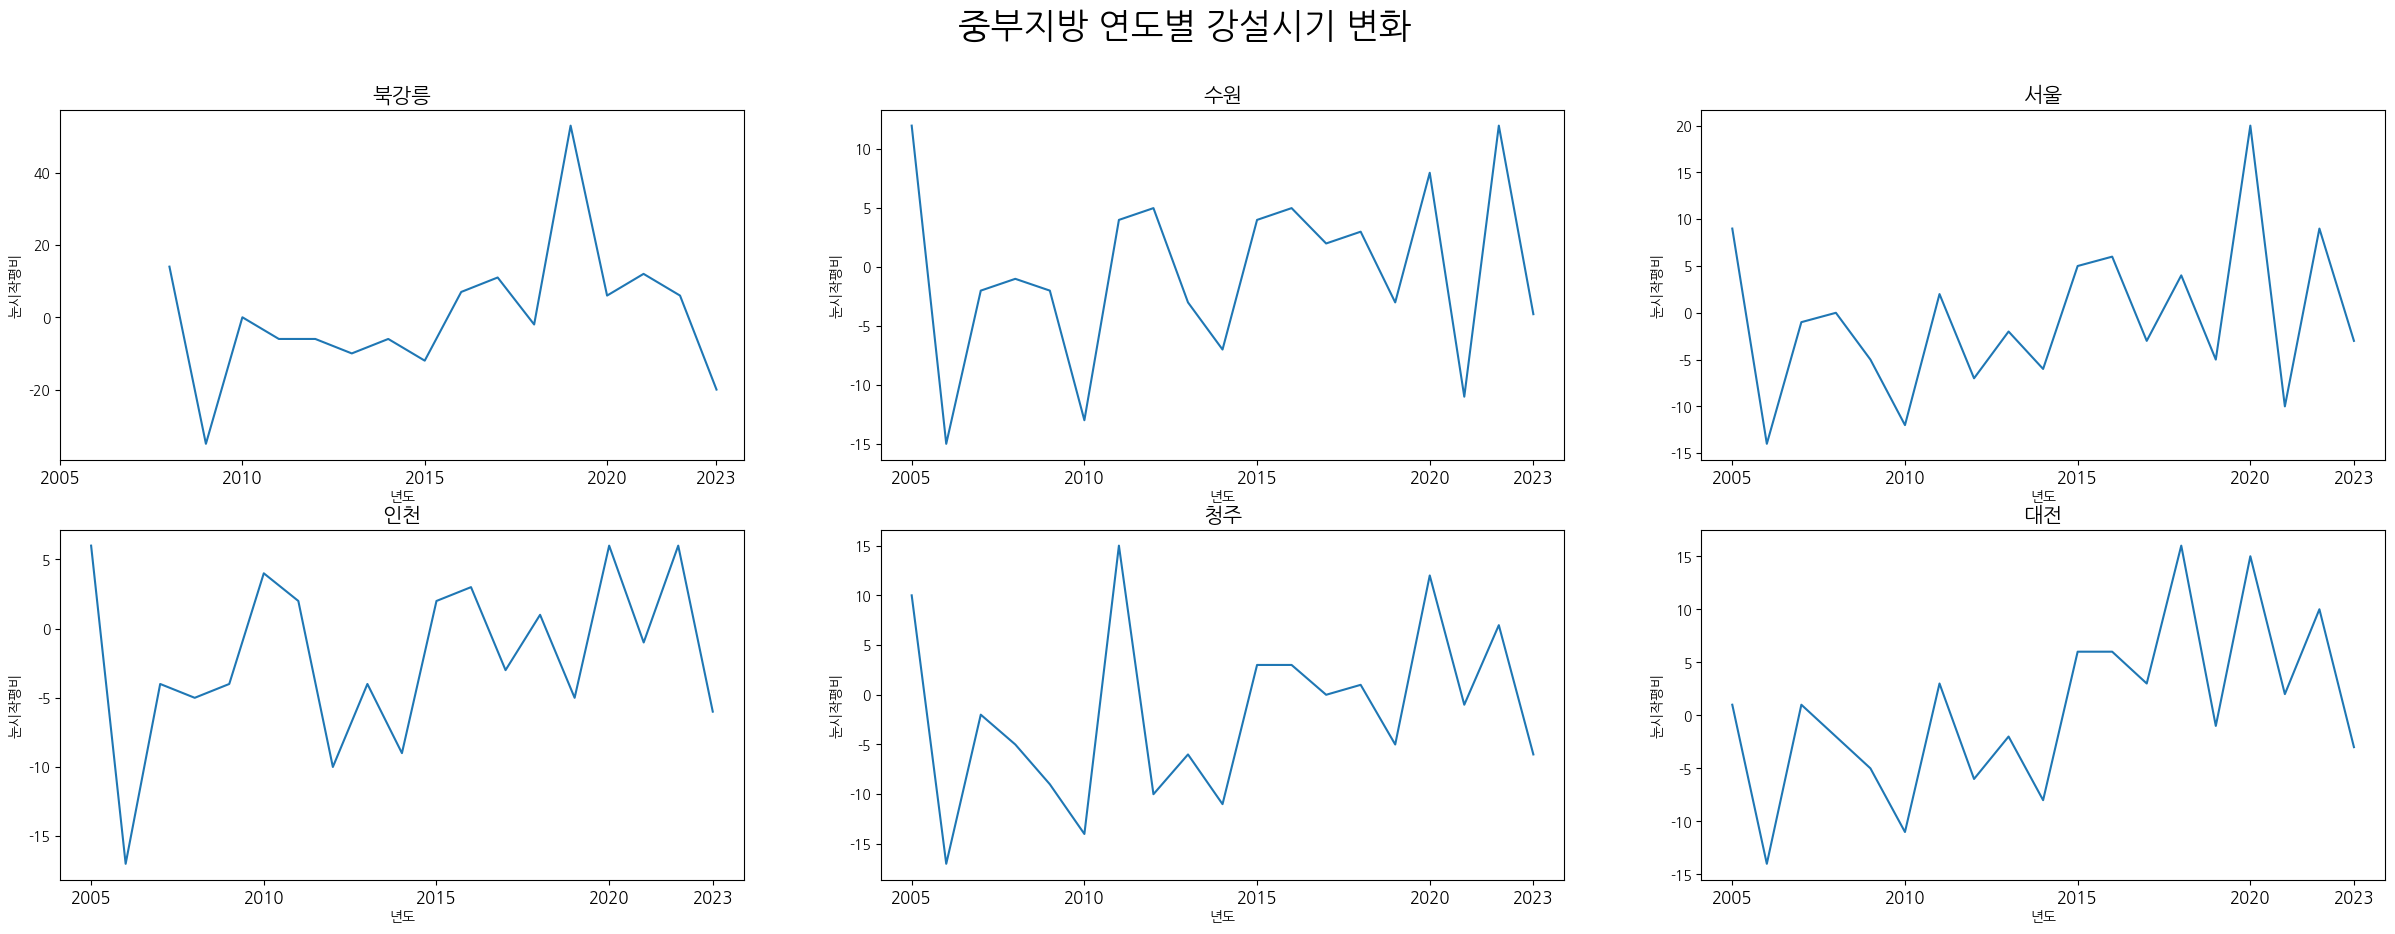

In [149]:
region=['북강릉','수원','서울','인천','청주','대전']

fig = plt.figure(figsize=(30, 10))
ax = fig.subplots(2, 3)

def plot_snow_region(i, region):
    KR = middle_snow_df[middle_snow_df['지점'] == region]
    row = i // 3
    col = i % 3
    custom_xticks = [2005, 2010, 2015, 2020, 2023]
    ax[row, col].plot(KR['년도'], KR['눈시작평비'])
    ax[row, col].set_title(region, fontsize=15)
    ax[row, col].set_xlabel('년도', fontsize=10)
    ax[row, col].set_ylabel('눈시작평비', fontsize=10)
    ax[row, col].set_xticks(custom_xticks)
    ax[row, col].set_xticklabels(custom_xticks, fontsize=12)

plt.suptitle('중부지방 연도별 강설시기 변화', fontsize=25)

for i in range(6):
    plot_snow_region(i, region[i])

plt.show()


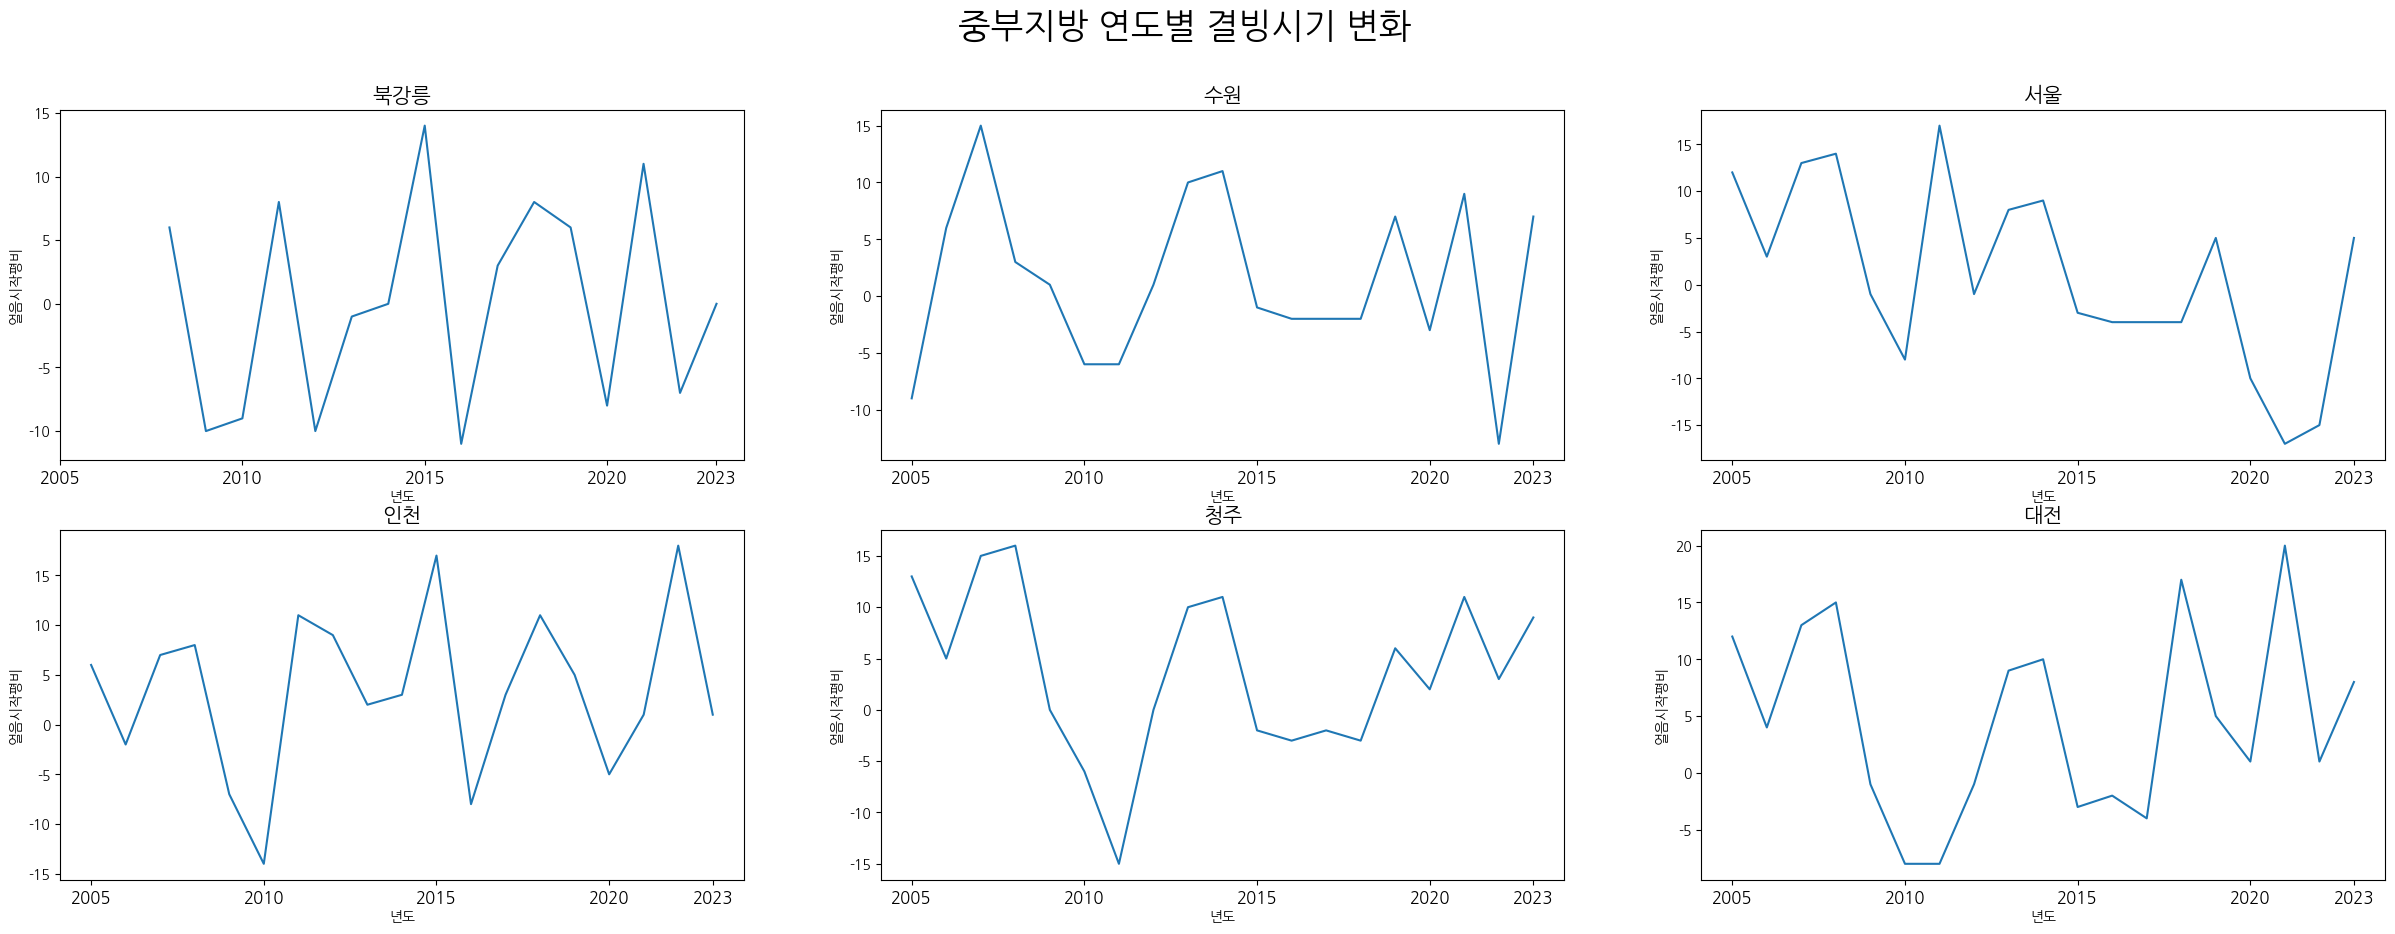

In [150]:
region=['북강릉','수원','서울','인천','청주','대전']

fig = plt.figure(figsize=(30, 10))
ax = fig.subplots(2, 3)

def plot_ice_region(i, region):
    KR = middle_ice_df[middle_snow_df['지점'] == region]
    row = i // 3
    col = i % 3
    custom_xticks = [2005, 2010, 2015, 2020, 2023]
    ax[row, col].plot(KR['년도'], KR['얼음시작평비'])
    ax[row, col].set_title(region, fontsize=15)
    ax[row, col].set_xlabel('년도', fontsize=10)
    ax[row, col].set_ylabel('얼음시작평비', fontsize=10)
    ax[row, col].set_xticks(custom_xticks)
    ax[row, col].set_xticklabels(custom_xticks, fontsize=12)

plt.suptitle('중부지방 연도별 결빙시기 변화', fontsize=25)

for i in range(6):
    plot_ice_region(i, region[i])

plt.show()

In [151]:
south_df['년도']=south_df['년도'].map(np.int64)
south_df.isna().sum()

south_df['얼음시작평비']=south_df['얼음시작평비'].str.replace('일','')
south_df=south_df.astype({'얼음시작평비':'int64'})


south_df['눈시작평비']=south_df['눈시작평비'].str.replace('일','')
south_df=south_df.astype({'눈시작평비':'int64'})


south_df

C:\Users\kdp\AppData\Local\Temp\ipykernel_23456\4215284261.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_df['년도']=south_df['년도'].map(np.int64)
C:\Users\kdp\AppData\Local\Temp\ipykernel_23456\4215284261.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_df['얼음시작평비']=south_df['얼음시작평비'].str.replace('일','')


,지점,년도,얼음시작평비,눈시작평비
255,창원,2005,-8,-23
256,창원,2006,8,10
257,창원,2007,-5,31
258,창원,2008,-5,-22
259,창원,2009,-6,4
...,...,...,...,...
801,전주,2019,1,4
802,전주,2020,-4,14
803,전주,2021,-21,-6
804,전주,2022,-3,7


In [152]:
south_ice_df=south_df[['지점','년도','얼음시작평비']]
south_ice_df

,지점,년도,얼음시작평비
255,창원,2005,-8
256,창원,2006,8
257,창원,2007,-5
258,창원,2008,-5
259,창원,2009,-6
...,...,...,...
801,전주,2019,1
802,전주,2020,-4
803,전주,2021,-21
804,전주,2022,-3


In [153]:
south_snow_df=south_df[['지점','년도','눈시작평비']]
south_snow_df

,지점,년도,눈시작평비
255,창원,2005,-23
256,창원,2006,10
257,창원,2007,31
258,창원,2008,-22
259,창원,2009,4
...,...,...,...
801,전주,2019,4
802,전주,2020,14
803,전주,2021,-6
804,전주,2022,7


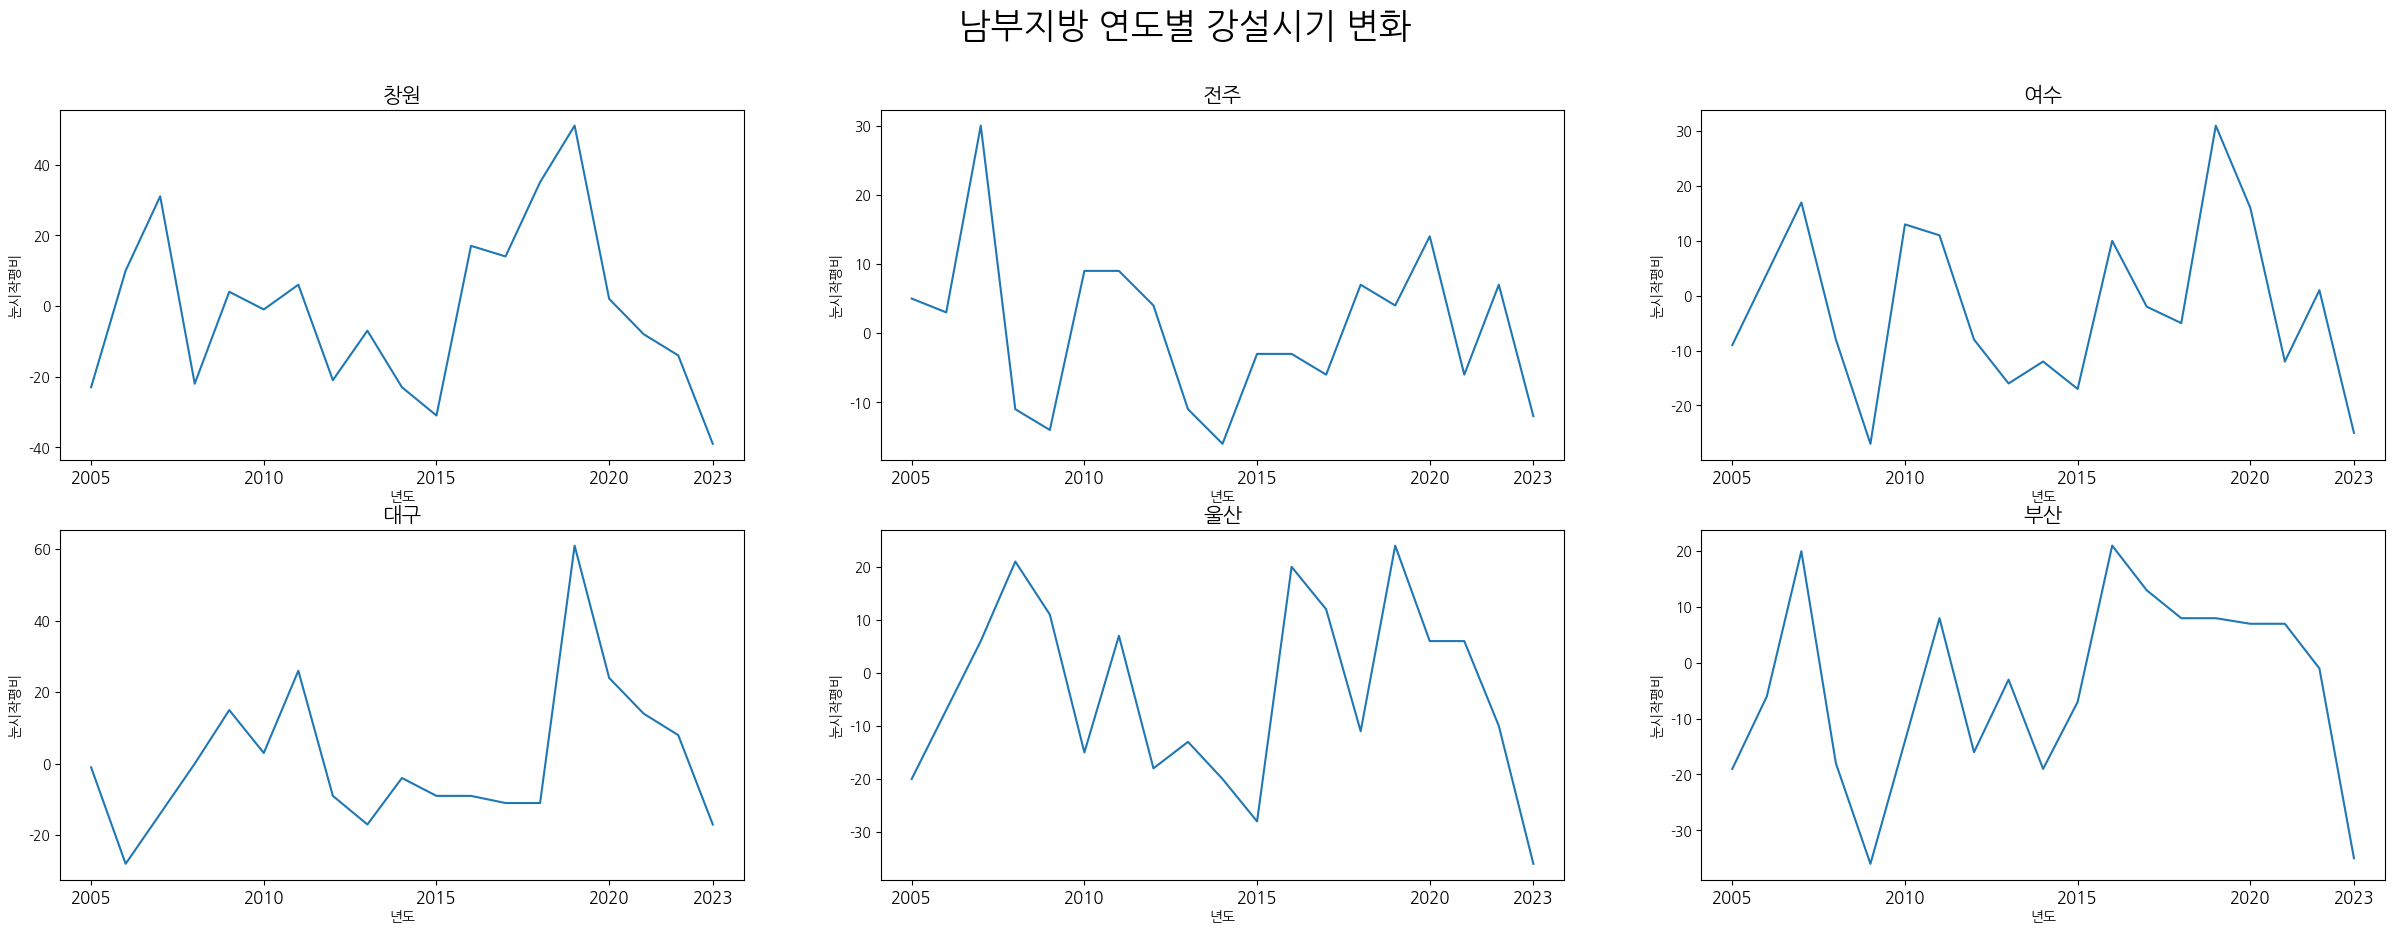

In [154]:
region=['창원','전주','여수','대구','울산','부산']

fig = plt.figure(figsize=(30, 10))
ax = fig.subplots(2, 3)

def plot_snow_region1(i, region):
    KR = south_snow_df[south_snow_df['지점'] == region]
    row = i // 3
    col = i % 3
    custom_xticks = [2005, 2010, 2015, 2020, 2023]
    ax[row, col].plot(KR['년도'], KR['눈시작평비'])
    ax[row, col].set_title(region, fontsize=15)
    ax[row, col].set_xlabel('년도', fontsize=10)
    ax[row, col].set_ylabel('눈시작평비', fontsize=10)
    ax[row, col].set_xticks(custom_xticks)
    ax[row, col].set_xticklabels(custom_xticks, fontsize=12)

plt.suptitle('남부지방 연도별 강설시기 변화', fontsize=25)

for i in range(6):
    plot_snow_region1(i, region[i])

plt.show()

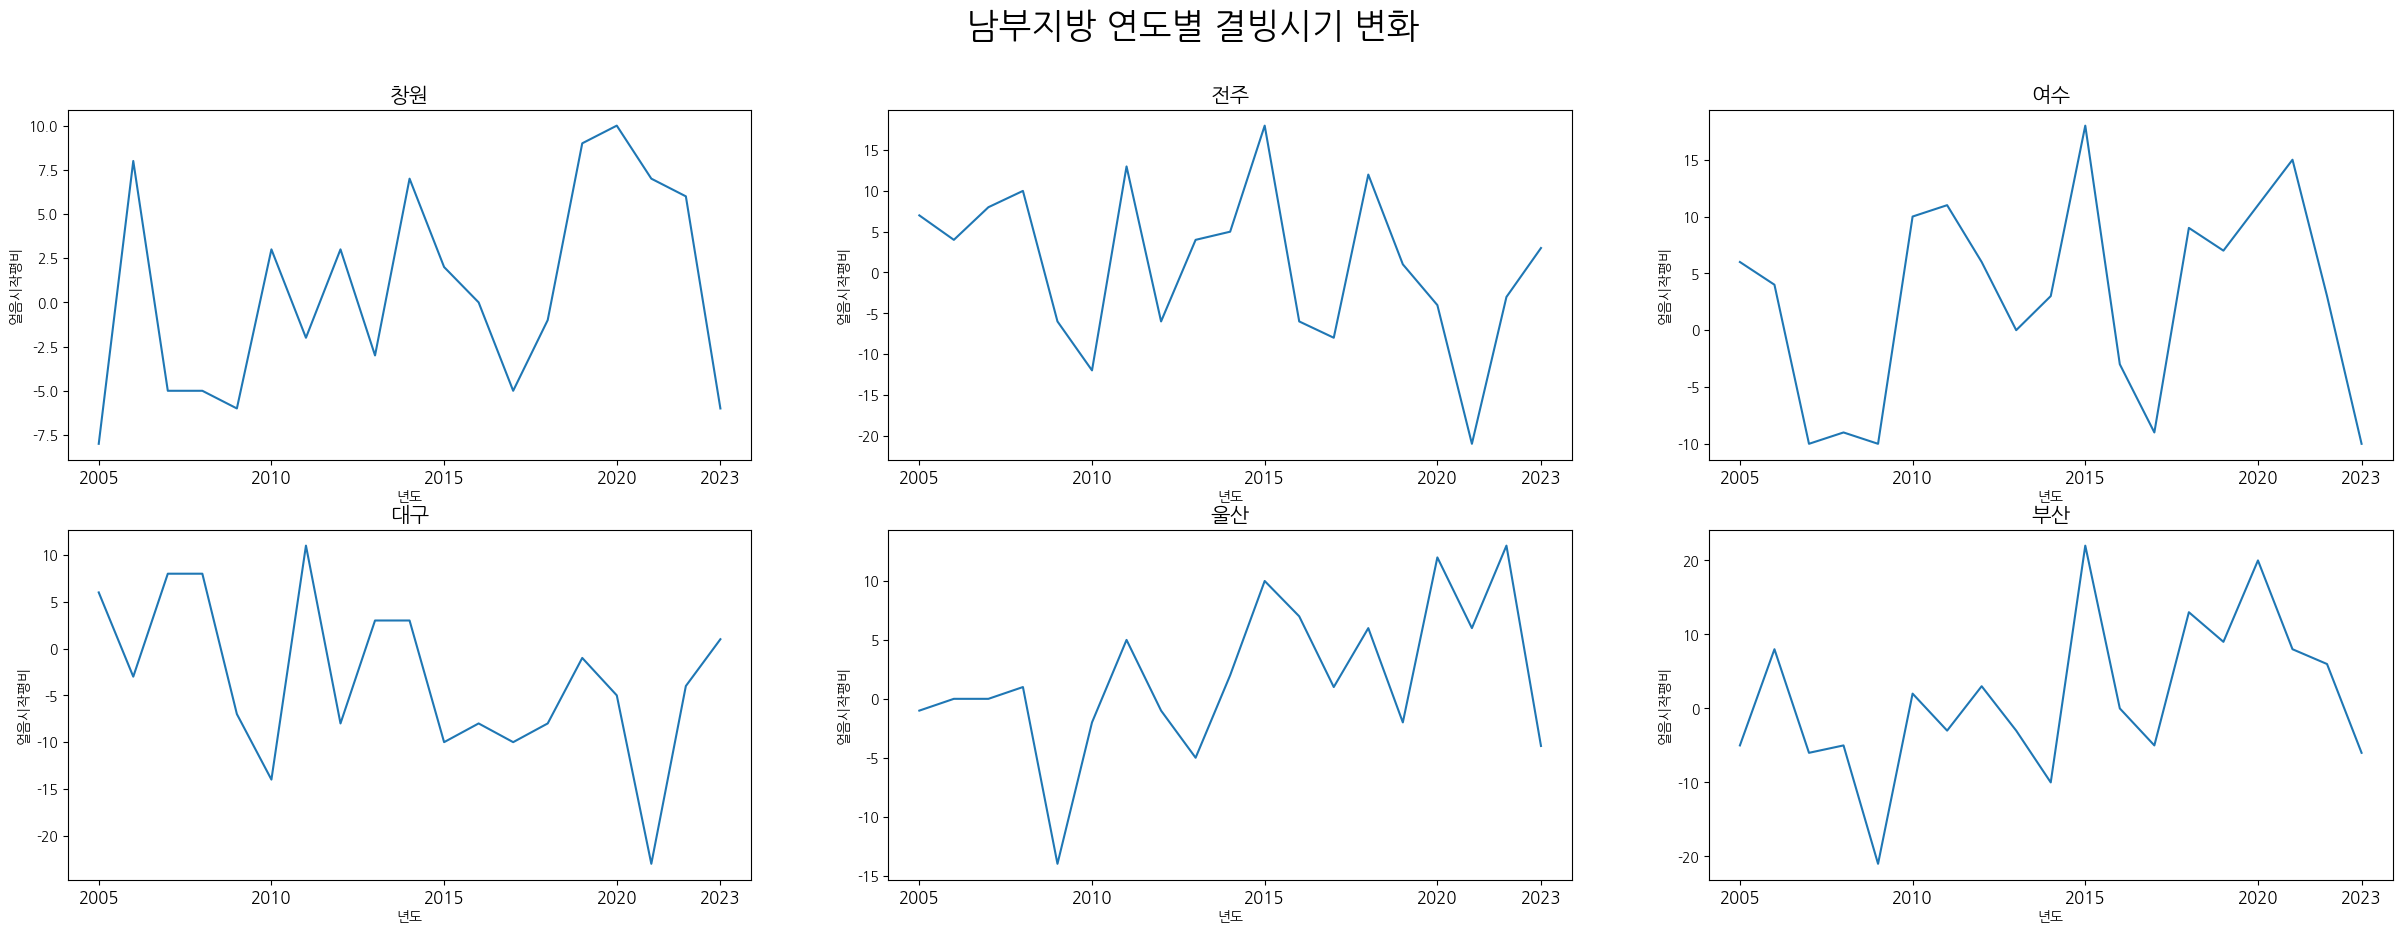

In [155]:
region=['창원','전주','여수','대구','울산','부산']

fig = plt.figure(figsize=(30, 10))
ax = fig.subplots(2, 3)

def plot_ice_region1(i, region):
    KR = south_ice_df[south_ice_df['지점'] == region]
    row = i // 3
    col = i % 3
    custom_xticks = [2005, 2010, 2015, 2020, 2023]
    ax[row, col].plot(KR['년도'], KR['얼음시작평비'])
    ax[row, col].set_title(region, fontsize=15)
    ax[row, col].set_xlabel('년도', fontsize=10)
    ax[row, col].set_ylabel('얼음시작평비', fontsize=10)
    ax[row, col].set_xticks(custom_xticks)
    ax[row, col].set_xticklabels(custom_xticks, fontsize=12)
    

plt.suptitle('남부지방 연도별 결빙시기 변화', fontsize=25)

for i in range(6):
    plot_ice_region1(i, region[i])

plt.show()